In [2]:
from sklearn import tree
import pandas as pd
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plt_plot(y_real,y_predicted):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(range(len(y_real)),y_real, color='g')
    ax.plot(range(len(y_predicted)),y_predicted,color='r')
    plt.show()
def Error_compute(y_real,y_predicted):
    y_diff=y_real-y_predicted
    diff_positive=y_diff[y_diff>0]
    diff_negitive_0=y_diff[y_diff<=0]
    if diff_negitive_0.shape[0] >0:
        sum_negitive_error=sum(np.exp(-np.log(0.5)*(diff_negitive_0/5)))
    else:
        sum_negitive_error=0
    if diff_positive.shape[0] >0:
        sum_positive_error=sum(np.exp(np.log(0.5)*(diff_positive/20)))
    else:
        sum_positive_error=0
    return (sum_negitive_error+sum_positive_error)/len(y_real)

In [4]:
data_dire="../feature"
columns_drop=['c1_1min_mean','c2_1min_mean', 'c3_1min_mean', 'c1_1min_var',
       'c2_1min_var', 'c3_1min_var', 'c1_1min_range',
       'c2_1min_range', 'c3_1min_range', 'mean_spindel','var_spindel', 'range_spindel',
              
        'v1_minvalue','v2_minvalue', 'v3_minvalue', 'v1_absmin', 'v2_absmin',
       'v3_absmin', 'v1_1min_mean','v2_1min_mean', 'v3_1min_mean', 'v1_1min_var',
       'v2_1min_var', 'v3_1min_var',  'v1_1min_range','v2_1min_range', 'v3_1min_range']

In [5]:
df_feature = pd.read_csv(os.path.join(data_dire,"1_v_c_s_feature.csv"))
df_feature = df_feature[:-60]
# df_feature.drop(columns=columns_drop,inplace=True)
df_train1=df_feature
df_train1=df_feature[(df_feature["tool_age"]<=40)]
df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
df_validation=df_feature[(df_feature["tool_age"]>130)]
print("df_train1",df_train1.shape)

df_feature = pd.read_csv(os.path.join(data_dire,"2_v_c_s_feature.csv"))
# df_feature.drop(columns=columns_drop,inplace=True)
df_train2=df_feature
# df_train2=df_feature[(df_feature["tool_age"]<=40)]
# df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
# df_validation=df_feature[(df_feature["tool_age"]>130)]
print("df_train2",df_train2.shape)

df_feature = pd.read_csv(os.path.join(data_dire,"3_v_c_s_feature.csv"))
# df_feature.drop(columns=columns_drop,inplace=True)
df_train3=df_feature
# df_train3=df_feature[(df_feature["tool_age"]<=40)]
# df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
# df_validation=df_feature[(df_feature["tool_age"]>130)]
print("df_train3",df_train3.shape)

df_train=pd.concat([df_train1,df_train2,df_train3],axis=0)
print(df_train.shape,df_test.shape)
columns_list=list(df_train.columns)
columns_list.remove("residual_life")
print(columns_list)
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(df_train[columns_list])
y_train = df_train["residual_life"]
x_test = min_max_scaler.fit_transform(df_test[columns_list])
y_test = df_test["residual_life"]
x_validation = min_max_scaler.fit_transform(df_validation[columns_list])
y_validation = df_validation["residual_life"]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_validation.shape,y_validation.shape)

df_train1 (459, 77)
df_train2 (2804, 77)
df_train3 (2074, 77)
(5337, 77) (1045, 77)
['c1_absmean', 'c2_absmean', 'c3_absmean', 'c1_absmedia', 'c2_absmedia', 'c3_absmedia', 'c1_absrange', 'c2_absrange', 'c3_absrange', 'c1_absstdn', 'c2_absstdn', 'c3_absstdn', 'c1_absvar', 'c2_absvar', 'c3_absvar', 'c1_maxvalue', 'c2_maxvalue', 'c3_maxvalue', 'c1_absmax', 'c2_absmax', 'c3_absmax', 'c1_minvalue', 'c2_minvalue', 'c3_minvalue', 'c1_absmin', 'c2_absmin', 'c3_absmin', 'tool_age', 'c1_1min_mean', 'c2_1min_mean', 'c3_1min_mean', 'c1_1min_var', 'c2_1min_var', 'c3_1min_var', 'c1_1min_range', 'c2_1min_range', 'c3_1min_range', 'mean_spindel', 'var_spindel', 'range_spindel', 'v1_absmean', 'v2_absmean', 'v3_absmean', 'v1_absmedia', 'v2_absmedia', 'v3_absmedia', 'v1_absrange', 'v2_absrange', 'v3_absrange', 'v1_absstdn', 'v2_absstdn', 'v3_absstdn', 'v1_absvar', 'v2_absvar', 'v3_absvar', 'v1_maxvalue', 'v2_maxvalue', 'v3_maxvalue', 'v1_absmax', 'v2_absmax', 'v3_absmax', 'v1_minvalue', 'v2_minvalue', 'v3

0.0761087434079133


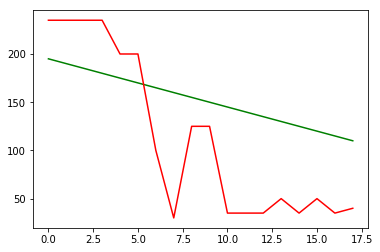

In [6]:
clf = tree.DecisionTreeRegressor()

clf = clf.fit(x_train, y_train)

y_predicted=clf.predict(x_test)
df_result=pd.DataFrame({"real":y_test,"predicted":y_predicted})
df_predict=df_result["predicted"].groupby(df_result['real']).mean()
err=Error_compute(df_predict.index,df_predict)
df_predict=df_predict.sort_index(ascending=False)
print(err)
plt_plot(df_predict.index,df_predict)